In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg
from mpl_toolkits.axes_grid1 import make_axes_locatable

import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point

%config InlineBackend.figure_format ='retina'

In [2]:
df = pd.read_csv("../music_baseball/acs2017_census_tract_data.csv")

In [3]:
df

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73996,72153750501,Puerto Rico,Yauco Municipio,6011,3035,2976,99.7,0.3,0.0,0.0,...,0.5,0.0,3.6,26.9,1576,59.2,33.8,7.0,0.0,20.8
73997,72153750502,Puerto Rico,Yauco Municipio,2342,959,1383,99.1,0.9,0.0,0.0,...,0.0,0.0,1.3,25.3,666,58.4,35.4,6.2,0.0,26.3
73998,72153750503,Puerto Rico,Yauco Municipio,2218,1001,1217,99.5,0.2,0.0,0.0,...,3.4,0.0,3.4,23.5,560,57.5,34.5,8.0,0.0,23.0
73999,72153750601,Puerto Rico,Yauco Municipio,4380,1964,2416,100.0,0.0,0.0,0.0,...,0.0,0.0,0.0,24.1,1062,67.7,30.4,1.9,0.0,29.5


In [4]:
mlb_counties_states = [('Maricopa County', 'Arizona'), ('Cobb County', 'Georgia'), ('Baltimore city', 'Maryland'), 
                       ('Suffolk County', 'Massachusetts'), ('Cook County', 'Illinois'), ('Hamilton County', 'Ohio'), 
                       ('Cuyahoga County', 'Ohio'), ('Denver County', 'Colorado'), ('Wayne County', 'Michigan'), 
                       ('Harris County', 'Texas'), ('Jackson County', 'Missouri'), ('Orange County', 'California'), 
                       ('Los Angeles County', 'California'), ('Miami-Dade County', 'Florida'), 
                       ('Milwaukee County', 'Wisconsin'), ('Hennepin County', 'Minnesota'), ('Bronx County', 'New York'), 
                       ('Queens County', 'New York'), ('Alameda County', 'California'), ('Philadelphia County', 'Pennsylvania'),
                       ('Allegheny County', 'Pennsylvania'), ('San Diego County', 'California'), 
                       ('San Francisco County', 'California'), ('King County', 'Washington'), ('St. Louis city', 'Missouri'), 
                       ('Pinellas County', 'Florida'), ('Tarrant County', 'Texas'), ('Dallas County', 'Texas'),
                       ('District of Columbia', 'District of Columbia'), ('Toronto Division', 'Ontario')]

df_mlb = df[df.apply(lambda row: (row['County'], row['State']) in mlb_counties_states, axis=1)]
df_mlb

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
1461,4013010101,Arizona,Maricopa County,4915,2419,2496,1.6,97.3,0.0,0.3,...,0.0,1.0,23.1,34.5,1594,87.1,2.9,9.0,1.0,5.2
1462,4013010102,Arizona,Maricopa County,4602,2363,2239,1.3,95.3,0.5,0.0,...,6.0,2.8,22.0,36.1,1713,83.9,4.7,11.4,0.0,3.1
1463,4013030401,Arizona,Maricopa County,4539,2309,2230,3.7,94.8,0.0,0.1,...,0.2,2.9,9.0,28.2,1324,83.8,8.6,7.6,0.0,2.2
1464,4013030402,Arizona,Maricopa County,4243,1994,2249,2.9,92.8,0.4,1.8,...,0.4,3.8,14.9,27.7,1906,83.4,9.0,7.1,0.5,9.7
1465,4013040502,Arizona,Maricopa County,5110,2254,2856,16.3,79.2,0.0,2.8,...,1.3,0.0,8.1,16.4,2032,75.9,4.5,19.0,0.5,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72378,55079187200,Wisconsin,Milwaukee County,5783,3823,1960,7.8,61.8,25.6,0.4,...,0.4,1.3,3.3,23.4,1959,87.4,9.3,3.3,0.0,1.6
72379,55079187300,Wisconsin,Milwaukee County,6395,3138,3257,4.2,83.0,0.3,1.1,...,0.6,0.6,4.0,24.5,3079,83.2,12.9,3.4,0.4,3.8
72380,55079187400,Wisconsin,Milwaukee County,3249,1634,1615,6.5,85.6,4.6,0.2,...,16.3,3.4,5.7,20.2,2575,93.4,4.7,1.9,0.0,2.2
72381,55079980000,Wisconsin,Milwaukee County,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN


In [5]:
df_mlb = df_mlb.drop(columns=['VotingAgeCitizen', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty', 'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork', 'Unemployment'])
df_mlb

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Income
1461,4013010101,Arizona,Maricopa County,4915,2419,2496,1.6,97.3,0.0,0.3,0.4,0.0,87167.0
1462,4013010102,Arizona,Maricopa County,4602,2363,2239,1.3,95.3,0.5,0.0,2.9,0.0,115725.0
1463,4013030401,Arizona,Maricopa County,4539,2309,2230,3.7,94.8,0.0,0.1,1.4,0.0,113889.0
1464,4013030402,Arizona,Maricopa County,4243,1994,2249,2.9,92.8,0.4,1.8,0.0,0.0,81994.0
1465,4013040502,Arizona,Maricopa County,5110,2254,2856,16.3,79.2,0.0,2.8,0.1,0.2,40434.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72378,55079187200,Wisconsin,Milwaukee County,5783,3823,1960,7.8,61.8,25.6,0.4,2.1,0.0,87616.0
72379,55079187300,Wisconsin,Milwaukee County,6395,3138,3257,4.2,83.0,0.3,1.1,8.1,0.0,96700.0
72380,55079187400,Wisconsin,Milwaukee County,3249,1634,1615,6.5,85.6,4.6,0.2,2.3,0.0,89737.0
72381,55079980000,Wisconsin,Milwaukee County,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_mlb_grouped = df_mlb.groupby('County').agg({      
    'TotalPop': 'sum',
    'Men': 'sum',
    'Women': 'sum',
    'Hispanic': 'mean',
    'White': 'mean',
    'Black': 'mean',
    'Native': 'mean',
    'Asian': 'mean',
    'Pacific': 'mean',
    'Income': 'mean'
}).reset_index()
df_mlb_grouped

,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Income
0,Alameda County,1629615,799649,829966,21.676944,33.896944,11.720278,0.307500,26.839167,0.767500,91676.997214
1,Allegheny County,1229605,593177,636428,2.043434,74.992929,17.041162,0.083586,3.000000,0.018182,56756.935897
2,Baltimore city,619796,291377,328419,4.935176,27.624121,62.404020,0.245729,2.428141,0.046231,49560.075758
3,Bronx County,1455846,685636,770210,53.665179,12.303869,28.331548,0.224107,3.817560,0.028869,41688.322188
4,Cobb County,739072,357252,381820,12.491667,54.370833,25.044167,0.132500,5.206667,0.041667,79262.666667
5,Cook County,5238541,2540704,2697837,23.597262,39.570190,28.680228,0.098251,6.219772,0.018707,61411.291381
6,Cuyahoga County,1257401,599033,658368,5.780135,51.590745,37.466591,0.164108,2.499097,0.020316,48931.751693
7,Dallas County,2552213,1257751,1294462,38.359772,32.804744,20.919355,0.181025,5.764896,0.043074,62102.281369
8,Denver County,678467,339400,339067,28.622378,56.404895,8.490909,0.516084,3.306294,0.127972,65337.887324
9,District of Columbia,672391,319046,353345,9.891620,34.320670,49.652514,0.174302,3.437989,0.034637,82936.299435


In [7]:
county_to_team = {
    'Milwaukee County': 'Brewers',
    'Los Angeles County': 'Dodgers',
    'Los Angeles County': 'Angels',
    'St. Louis city': 'Cardinals',
    'Maricopa County': 'Diamondbacks',
    'Bronx County': 'Yankees',
    'Philadelphia County': 'Phillies',
    'Wayne County': 'Tigers',
    'Denver County': 'Rockies',
    'Orange County': 'Angels',
    'Suffolk County': 'Red Sox',
    'Tarrant County': 'Rangers',
    'Dallas County': 'Rangers',
    'Hamilton County': 'Reds',
    'Cook County': 'Cubs',
    'Cook County': 'White Sox',
    'Jackson County': 'Royals',
    'Miami-Dade County': 'Marlins',
    'Harris County': 'Astros',
    'District of Columbia': 'Nationals',
    'Alameda County': 'Athletics',
    'San Francisco County': 'Giants',
    'Baltimore city': 'Orioles',
    'San Diego County': 'Padres',
    'Allegheny County': 'Pirates',
    'Cuyahoga County': 'Guardians',
    'King County': 'Mariners',
    'Hennepin County': 'Twins',
    'Pinellas County': 'Rays',
    'Cobb County': 'Braves',
    'Queens County': 'Mets',
    # Add any other mappings here...
}

df_mlb_grouped['Team'] = df_mlb_grouped['County'].map(county_to_team)
df_mlb_grouped

,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Income,Team
0,Alameda County,1629615,799649,829966,21.676944,33.896944,11.720278,0.307500,26.839167,0.767500,91676.997214,Athletics
1,Allegheny County,1229605,593177,636428,2.043434,74.992929,17.041162,0.083586,3.000000,0.018182,56756.935897,Pirates
2,Baltimore city,619796,291377,328419,4.935176,27.624121,62.404020,0.245729,2.428141,0.046231,49560.075758,Orioles
3,Bronx County,1455846,685636,770210,53.665179,12.303869,28.331548,0.224107,3.817560,0.028869,41688.322188,Yankees
4,Cobb County,739072,357252,381820,12.491667,54.370833,25.044167,0.132500,5.206667,0.041667,79262.666667,Braves
5,Cook County,5238541,2540704,2697837,23.597262,39.570190,28.680228,0.098251,6.219772,0.018707,61411.291381,White Sox
6,Cuyahoga County,1257401,599033,658368,5.780135,51.590745,37.466591,0.164108,2.499097,0.020316,48931.751693,Guardians
7,Dallas County,2552213,1257751,1294462,38.359772,32.804744,20.919355,0.181025,5.764896,0.043074,62102.281369,Rangers
8,Denver County,678467,339400,339067,28.622378,56.404895,8.490909,0.516084,3.306294,0.127972,65337.887324,Rockies
9,District of Columbia,672391,319046,353345,9.891620,34.320670,49.652514,0.174302,3.437989,0.034637,82936.299435,Nationals


In [8]:
geo = pd.read_csv('../music_baseball/Music_Baseball_Data.csv',delimiter=",")
geo

,City,Team,League,Division,Ballpark,County,Latitude,Longitude,City (Ballpark),Year (Ballpark),...,Popularity',Happiness',Acousticness,Instrumentalness,Loudness,Duration,Year (Song),Artist (Writing),City Pop.,Metro Pop.
0,Milwaukee,Brewers,NaN,NaN,American Family Field,Milwaukee,43.027978,-87.971150,"Milwaukee, WI",2001,...,80.0,90.0,23.0,11.0,-12.0,3:11,1981,Hall and Oates,"577,222","1,574,731"
1,Los Angeles,Angels,NaN,NaN,Angel Stadium,Los Angeles,33.800308,-117.882732,"Anaheim, CA",1966,...,81.0,40.0,2.0,1.0,-6.0,6:46,1989,Guns n' Roses,NaN,NaN
2,St. Louis,Cardinals,NaN,NaN,Busch Stadium,St. Louis,38.622619,-90.192821,"St. Louis, MO",2006,...,21.0,57.0,0.0,88.0,-7.0,7:10,1999,Hami,NaN,NaN
3,Arizona,Diamondbacks,NaN,NaN,Chase Field,Maricopa,33.445526,-112.066664,"Phoenix, AZ",1998,...,NaN,NaN,NaN,NaN,NaN,1:31,2011,Roger Clyne and the Peacemakers,NaN,NaN
4,New York,Mets,NaN,NaN,Citi Field,Queens,40.756338,-73.845821,"Queens, NY",2009,...,62.0,85.0,61.0,0.0,-8.0,3:04,1978,Ace Frehley,NaN,NaN
5,Philadelphia,Phillies,NaN,NaN,Citizens Bank Park,Philadelphia,39.906057,-75.167469,"Philadelphia, PA",2004,...,85.0,93.0,1.0,0.0,-3.0,3:13,2014,Pitbull,NaN,NaN
6,Detroit,Tigers,NaN,NaN,Comerica Park,Wayne,42.339011,-83.048543,"Detroit, MI",2000,...,81.0,92.0,0.0,1.0,-7.0,2:01,1997,Blur,NaN,NaN
7,Colorado,Rockies,NaN,NaN,Coors Field,Denver,39.755882,-104.994178,"Denver, CO",1995,...,63.0,42.0,2.0,79.0,-15.0,5:15,1973,Joe Walsh,NaN,NaN
8,Los Angeles,Dodgers,NaN,NaN,Dodger Stadium,Los Angeles,34.073851,-118.240016,"Los Angeles, CA",1962,...,42.0,56.0,12.0,0.0,-8.0,3:29,1983,Randy Newman,NaN,NaN
9,Boston,Red Sox,NaN,NaN,Fenway Park,Suffolk,42.346676,-71.097218,"Boston, MA",1912,...,48.0,86.0,18.0,0.0,-6.0,2:47,1965,The Standells,NaN,NaN


In [9]:
df_mlb_geo = pd.merge(df_mlb_grouped,geo,left_on='Team',right_on='Team',how='inner')
df_mlb_geo

,County_x,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Popularity',Happiness',Acousticness,Instrumentalness,Loudness,Duration,Year (Song),Artist (Writing),City Pop.,Metro Pop.
0,Alameda County,1629615,799649,829966,21.676944,33.896944,11.720278,0.307500,26.839167,0.767500,...,72.0,91.0,14.0,5.0,12.0,4:59,1975,Kool and the Gang,NaN,NaN
1,Allegheny County,1229605,593177,636428,2.043434,74.992929,17.041162,0.083586,3.000000,0.018182,...,NaN,NaN,NaN,NaN,NaN,NaN,2001,The Buzz Poets,NaN,NaN
2,Baltimore city,619796,291377,328419,4.935176,27.624121,62.404020,0.245729,2.428141,0.046231,...,NaN,NaN,NaN,NaN,NaN,NaN,1979,Walter Woodward,NaN,NaN
3,Bronx County,1455846,685636,770210,53.665179,12.303869,28.331548,0.224107,3.817560,0.028869,...,NaN,NaN,NaN,NaN,NaN,NaN,1977,Frank Sinatra,NaN,NaN
4,Cobb County,739072,357252,381820,12.491667,54.370833,25.044167,0.132500,5.206667,0.041667,...,NaN,NaN,NaN,NaN,NaN,NaN,1999,Kernkraft 400,NaN,NaN
5,Cook County,5238541,2540704,2697837,23.597262,39.570190,28.680228,0.098251,6.219772,0.018707,...,68.0,95.0,1.0,0.0,-4.0,3:26,2012,Pitbull,NaN,NaN
6,Cuyahoga County,1257401,599033,658368,5.780135,51.590745,37.466591,0.164108,2.499097,0.020316,...,NaN,NaN,NaN,NaN,NaN,NaN,1998,Presidents of the United States of America,NaN,NaN
7,Dallas County,2552213,1257751,1294462,38.359772,32.804744,20.919355,0.181025,5.764896,0.043074,...,33.0,66.0,16.0,0.0,-8.0,4:03,1995,Pat Green,NaN,NaN
8,Tarrant County,1983675,971142,1012533,29.363202,47.877528,15.654494,0.266573,4.398596,0.179213,...,33.0,66.0,16.0,0.0,-8.0,4:03,1995,Pat Green,NaN,NaN
9,Denver County,678467,339400,339067,28.622378,56.404895,8.490909,0.516084,3.306294,0.127972,...,63.0,42.0,2.0,79.0,-15.0,5:15,1973,Joe Walsh,NaN,NaN


In [10]:
import csv

# Specify the output CSV file path
csv_file = 'DF_MLB_GEO.csv'

# Write the merged list to the CSV file
with open(csv_file, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(df_mlb_geo)

print("Merged list exported to", csv_file)

Merged list exported to DF_MLB_GEO.csv


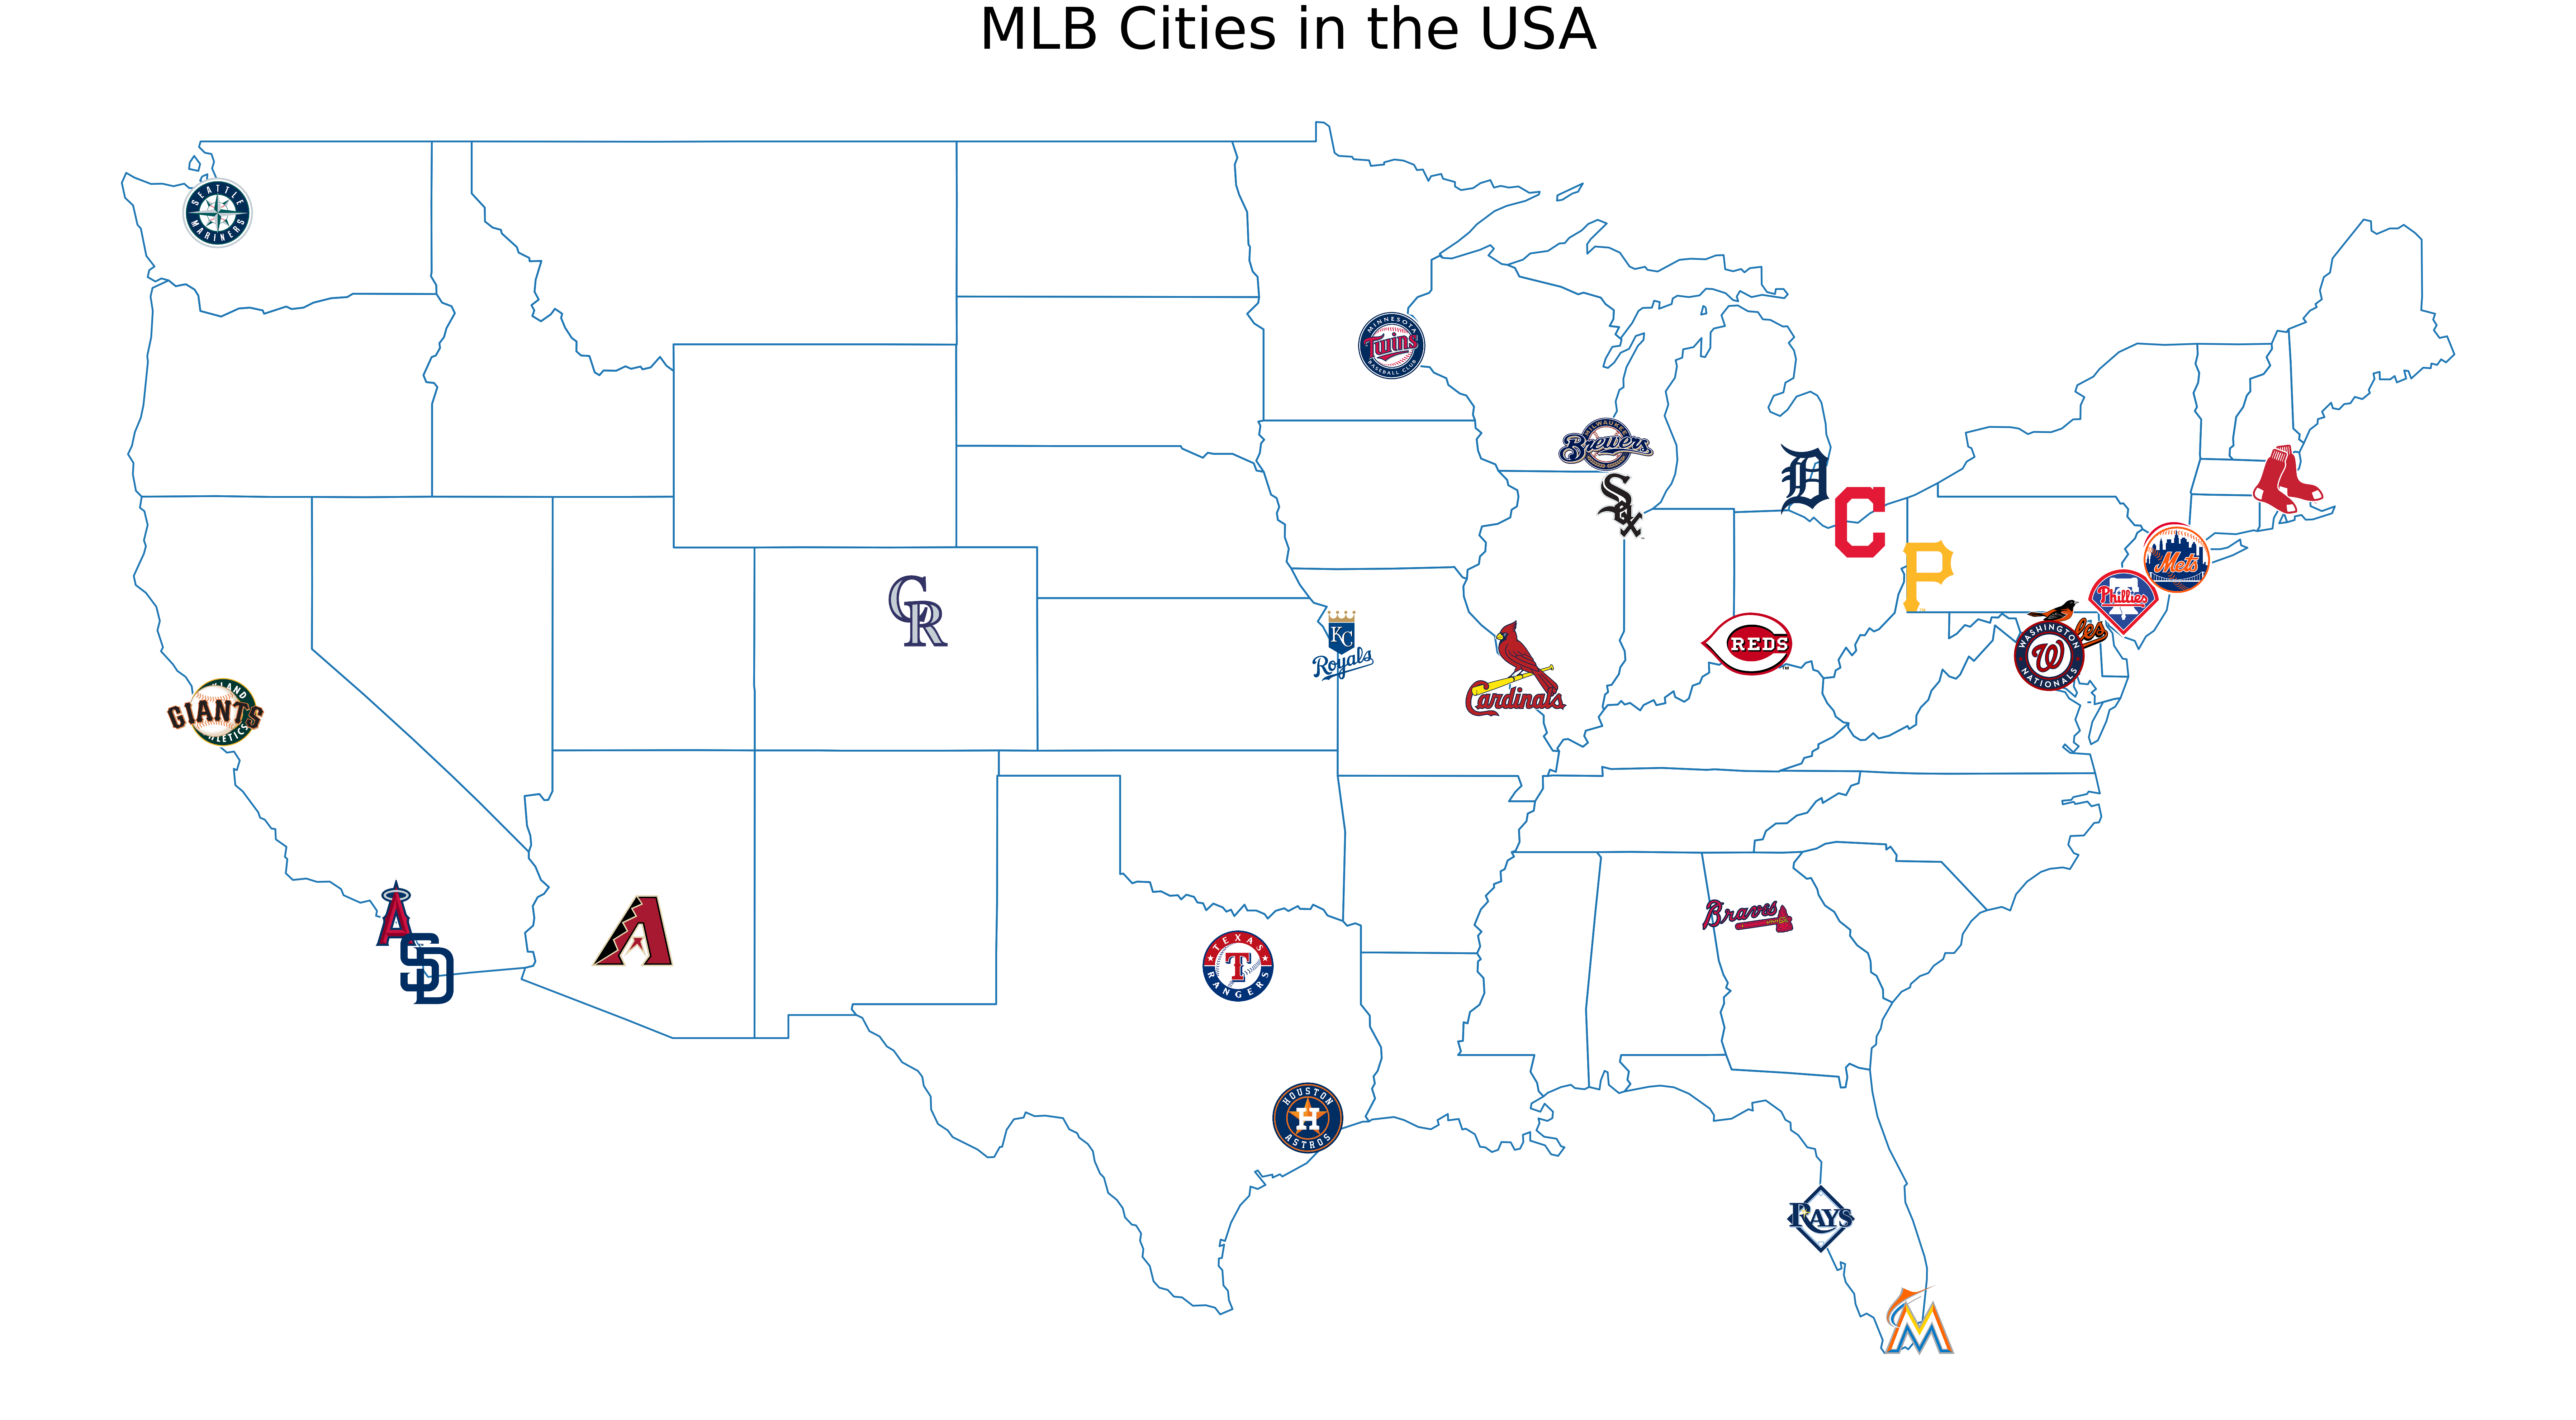

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import geopandas as gpd
from shapely.geometry import Point
from PIL import Image

# Generate the GeoDataFrame
geometry = [Point(xy) for xy in zip(df_mlb_geo['Longitude'], df_mlb_geo['Latitude'])]
geo_pandas_df = gpd.GeoDataFrame(df_mlb_geo, geometry=geometry, crs="EPSG:4326")

# Fetch the US states map
us_states = gpd.read_file('https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json')

# Exclude Alaska, Hawaii and Puerto Rico
us_states = us_states[~us_states.name.isin(['Alaska', 'Hawaii', 'Puerto Rico'])]

# Change the CRS to match
geo_pandas_df = geo_pandas_df.to_crs(us_states.crs)

# Construct your image dictionary
logo_dir = '/users/jmailey/ds_1300_notebooks/music_baseball/MLB_logos'
logo_files = os.listdir(logo_dir)

# Split each file name into city and team name, use team name as key for the dictionary
image_dict = {logo.split('-')[1].lower(): plt.imread(os.path.join(logo_dir, logo)) for logo in logo_files if logo.endswith('.png')}

# Create the plot
fig, ax = plt.subplots(figsize=(50,50))

# Plot US states boundaries
us_states.boundary.plot(ax=ax, linewidth=2.5)

# For each team, create an annotation box with the corresponding logo
for x, y, team in zip(geo_pandas_df.geometry.x, geo_pandas_df.geometry.y, geo_pandas_df['Team']):
    img = OffsetImage(image_dict[team.lower()], zoom=0.2)  # Adjust zoom to resize image
    ab = AnnotationBbox(img, (x, y), frameon=False)
    ax.add_artist(ab)

ax.axis('off')

plt.title("MLB Cities in the USA", fontsize=80, fontfamily='sans-serif')

plt.tight_layout()

plt.savefig('MLB_Cities.pdf', format='pdf')

plt.show()

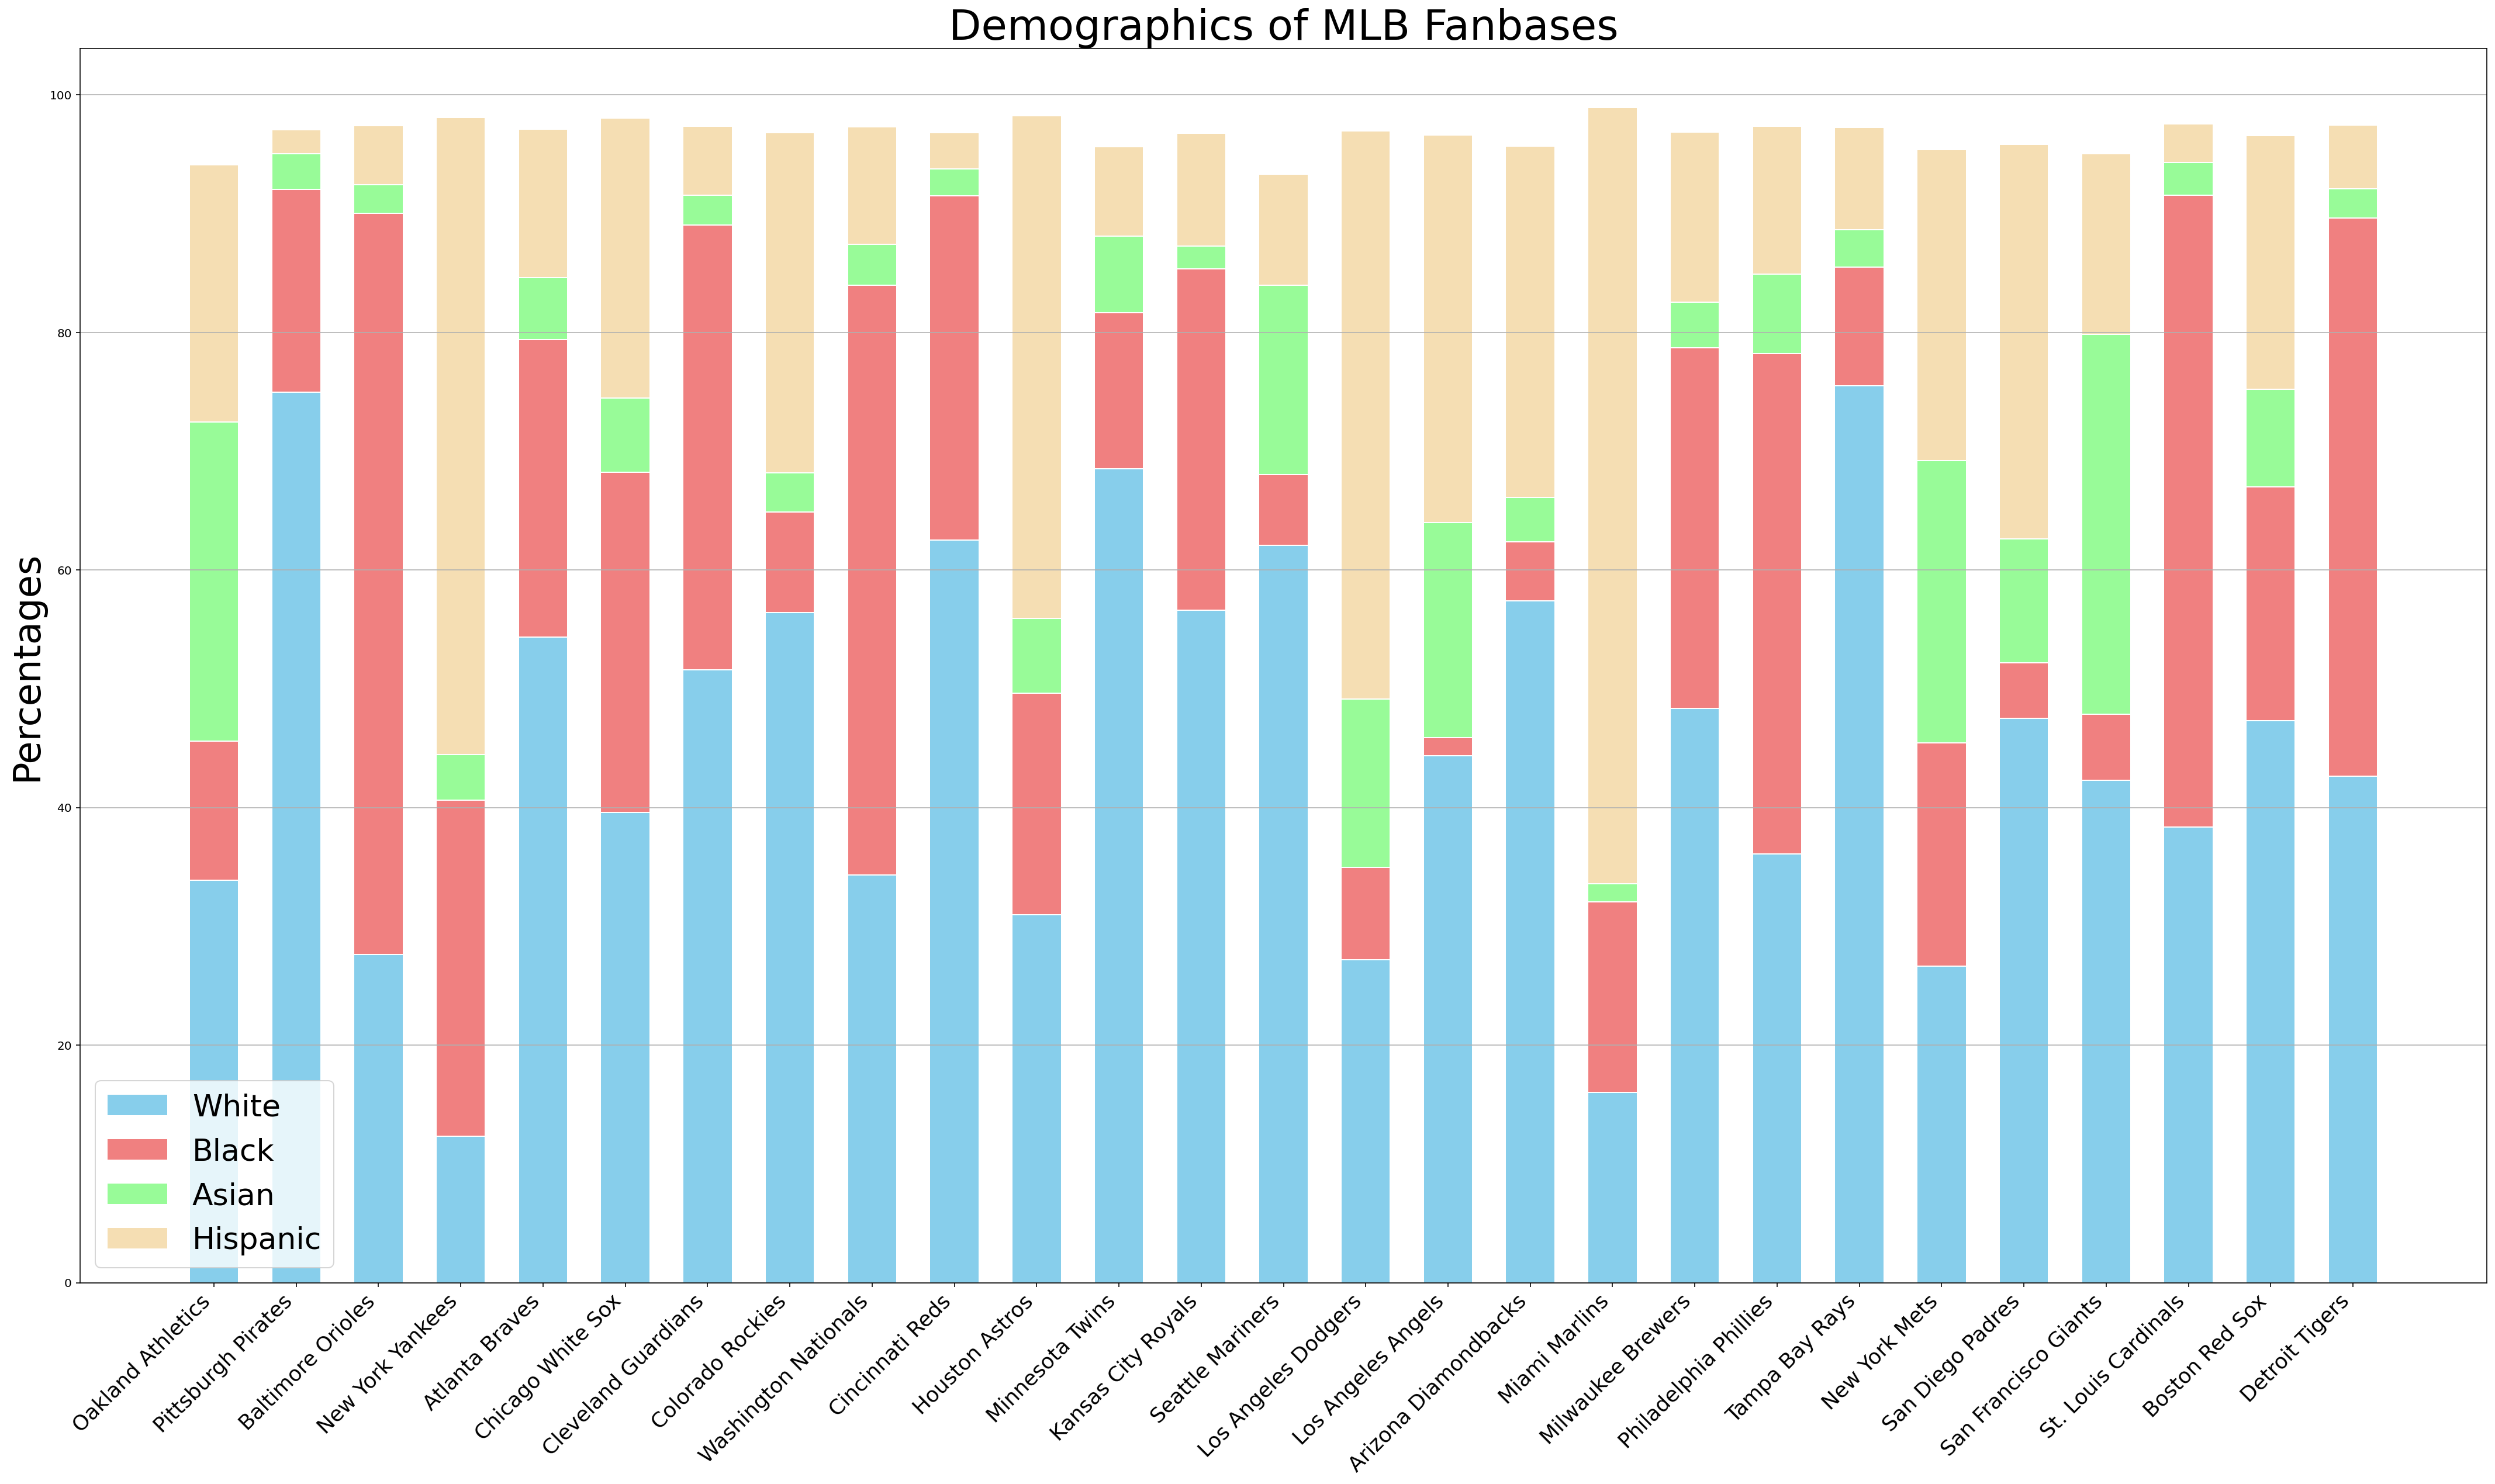

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df_mlb_geo = df_mlb_geo[~df_mlb_geo['County_x'].isin(['Dallas County', 'Tarrant County'])]

combined_county = df_mlb_geo[(df_mlb_geo['County_x'] == 'Dallas County') | (df_mlb_geo['County_x'] == 'Tarrant County')].groupby(['Team']).mean().reset_index()
combined_county['County_x'] = 'Dallas County and Tarrant County'
df_combined = pd.concat([df_mlb_geo, combined_county])

county_to_team = {
    'Alameda County': 'Oakland Athletics',
    'Allegheny County': 'Pittsburgh Pirates',
    'Baltimore city': 'Baltimore Orioles',
    'Bronx County': 'New York Yankees',
    'Cobb County': 'Atlanta Braves',
    'Cook County': 'Chicago White Sox',
    'Cuyahoga County': 'Cleveland Guardians',
    'Dallas County and Tarrant County': 'Texas Rangers', # <-- combined Texas Rangers
    'Denver County': 'Colorado Rockies',
    'District of Columbia': 'Washington Nationals',
    'Hamilton County': 'Cincinnati Reds',
    'Harris County': 'Houston Astros',
    'Hennepin County': 'Minnesota Twins',
    'Jackson County': 'Kansas City Royals',
    'King County': 'Seattle Mariners',
    'Los Angeles County': 'Los Angeles Dodgers',
    'Maricopa County': 'Arizona Diamondbacks',
    'Miami-Dade County': 'Miami Marlins',
    'Milwaukee County': 'Milwaukee Brewers',
    'Orange County': 'Los Angeles Angels',
    'Philadelphia County': 'Philadelphia Phillies',
    'Pinellas County': 'Tampa Bay Rays',
    'Queens County': 'New York Mets',
    'San Diego County': 'San Diego Padres',
    'San Francisco County': 'San Francisco Giants',
    'St. Louis city': 'St. Louis Cardinals',
    'Suffolk County': 'Boston Red Sox',
    'Wayne County': 'Detroit Tigers'
}

df_combined['Team'] = df_combined['County_x'].map(county_to_team)

plt.figure(figsize=(30, 18))

bar_width = 0.6
bar1 = np.arange(len(df_combined['County_x']))

plt.bar(bar1, df_combined['White'], color='skyblue', width=bar_width, edgecolor='white', label='White')
plt.bar(bar1, df_combined['Black'], bottom=df_combined['White'], color='lightcoral', width=bar_width, edgecolor='white', label='Black')
plt.bar(bar1, df_combined['Asian'], bottom=df_combined['White'] + df_combined['Black'], color='palegreen', width=bar_width, edgecolor='white', label='Asian')
plt.bar(bar1, df_combined['Hispanic'], bottom=df_combined['White'] + df_combined['Black'] + df_combined['Asian'], color='wheat', width=bar_width, edgecolor='white', label='Hispanic')

plt.ylabel('Percentages', fontsize=32)
plt.title('Demographics of MLB Fanbases', fontsize=36)
plt.xticks([r for r in range(len(df_combined['Team']))], df_combined['Team'], rotation=45, ha='right', fontsize=18)
plt.grid(axis='y')
plt.legend(fontsize=26)
plt.tight_layout(pad=2)
plt.savefig('MLB_Demographics.pdf', format='pdf')
plt.show()

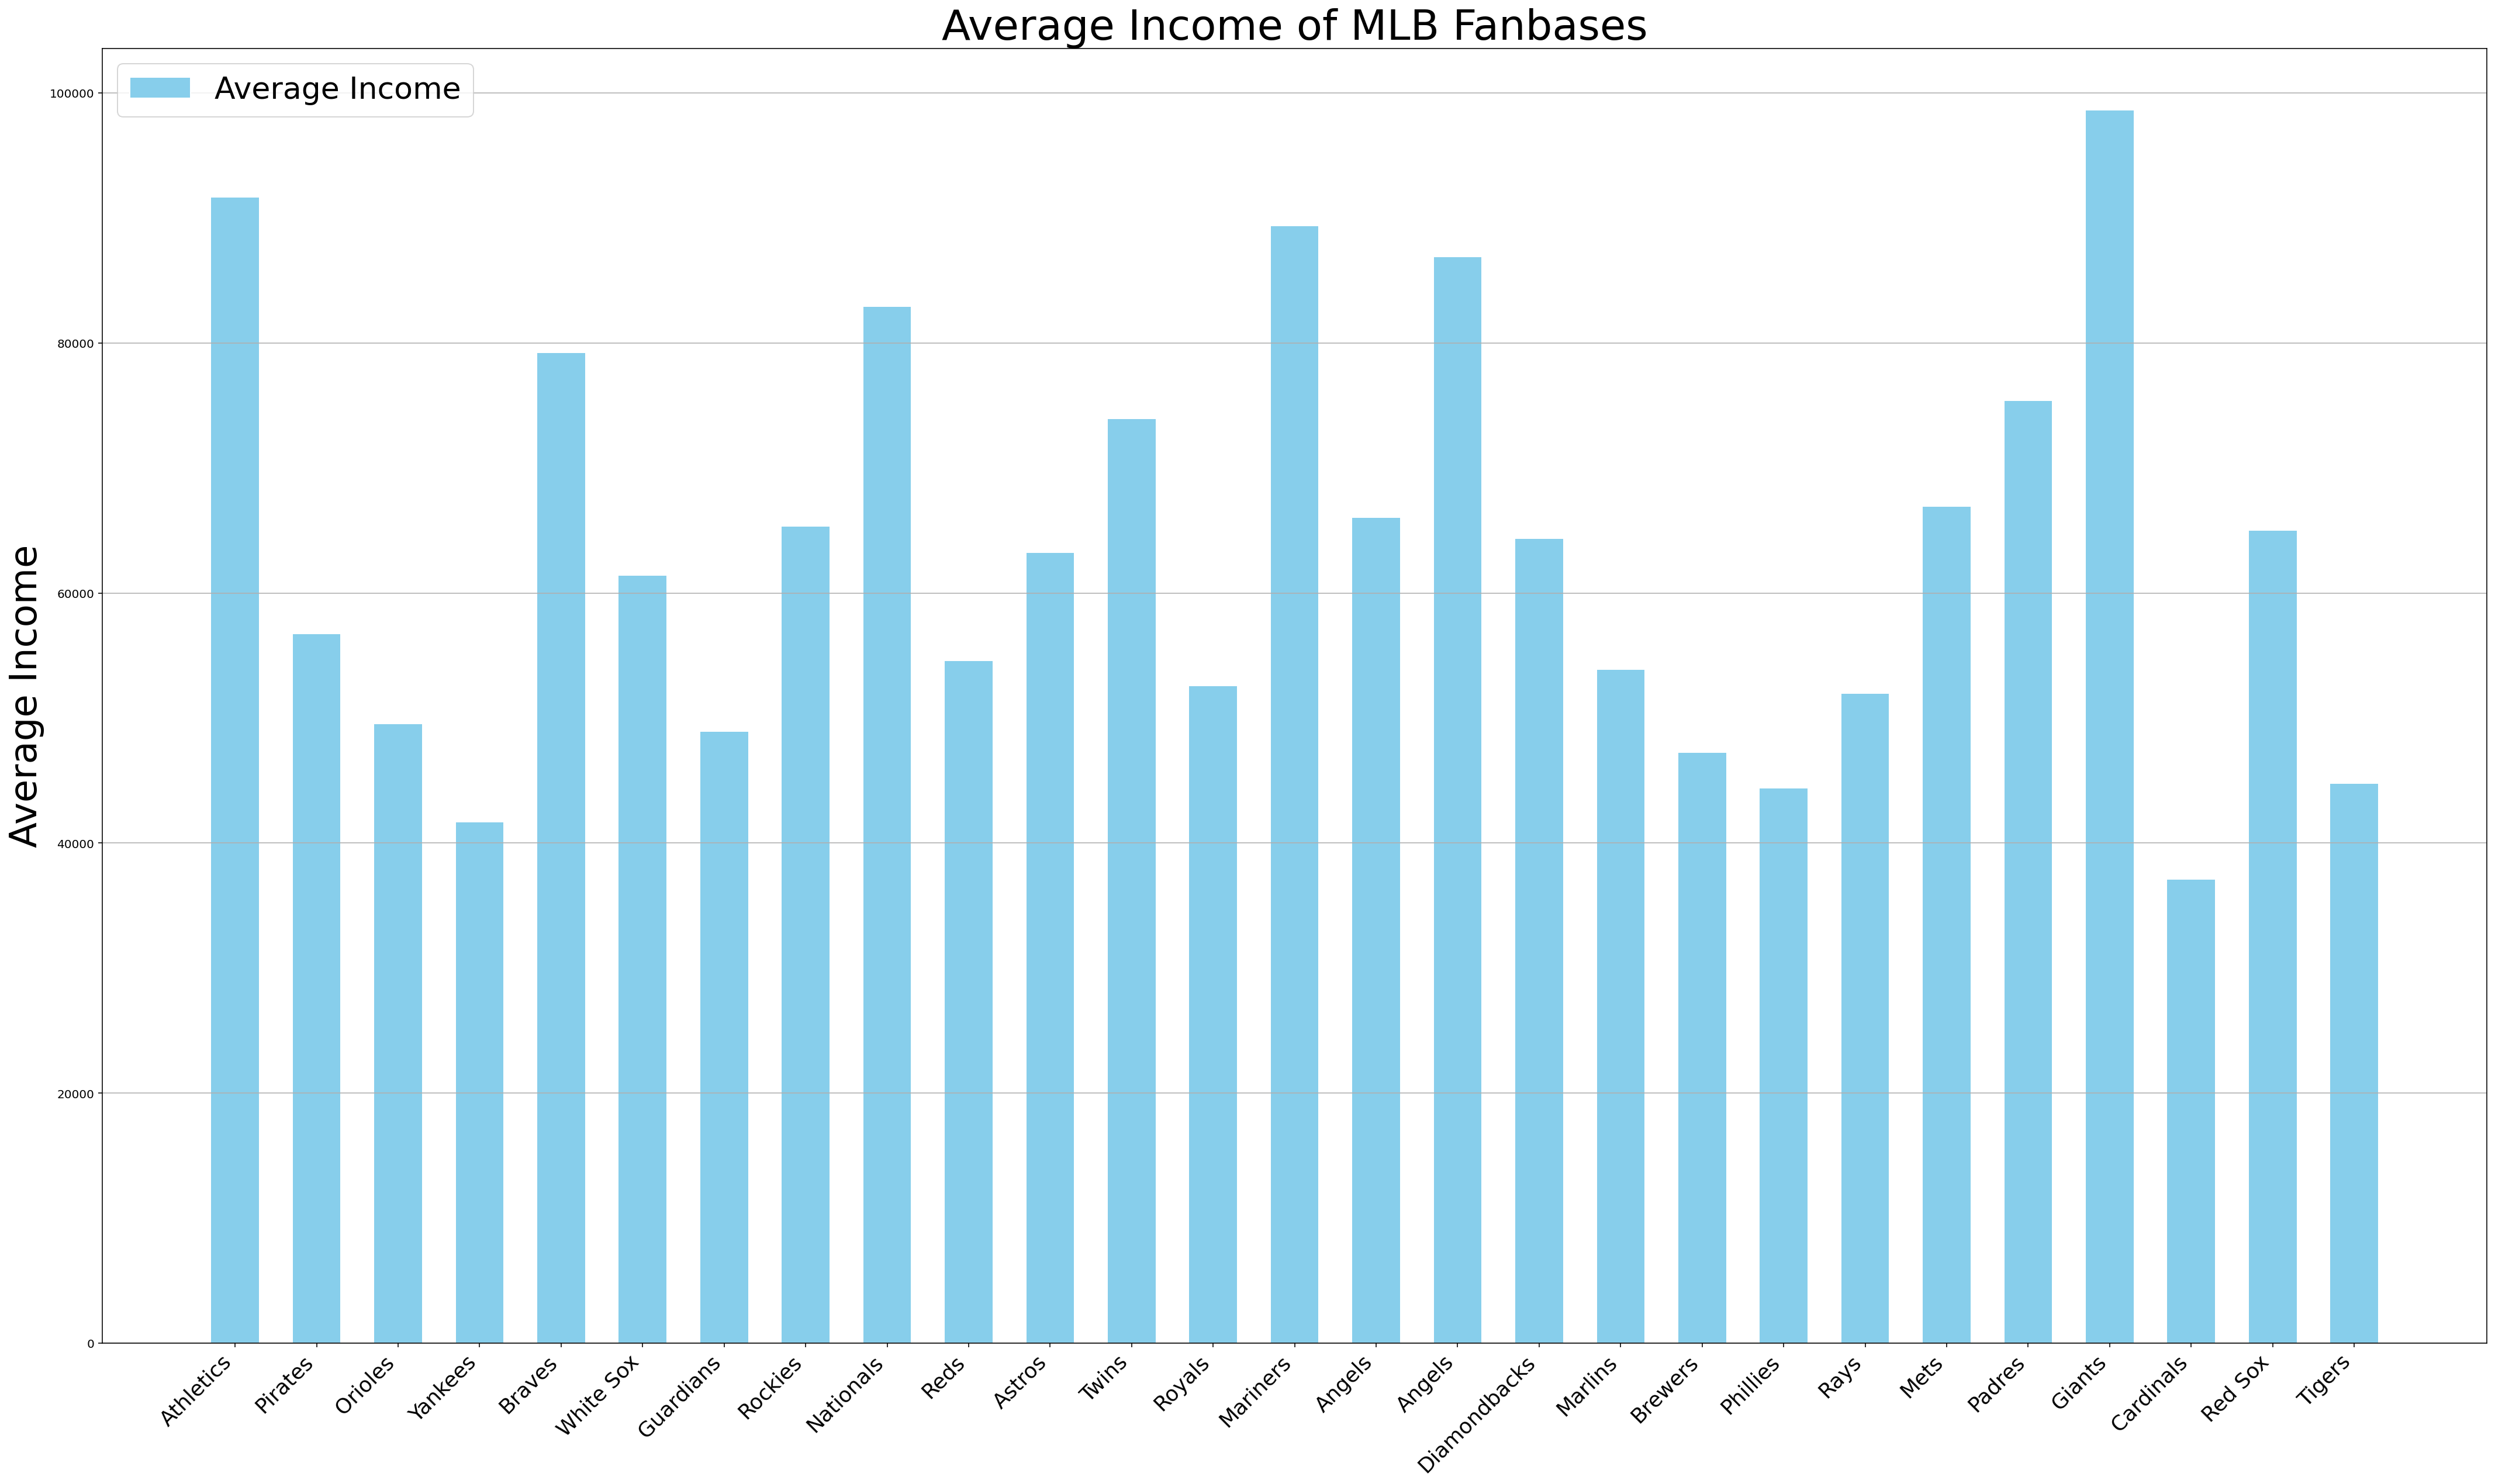

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

df_mlb_geo = df_mlb_geo[~df_mlb_geo['County_x'].isin(['Dallas County', 'Tarrant County'])]

combined_county = df_mlb_geo[(df_mlb_geo['County_x'] == 'Dallas County') | (df_mlb_geo['County_x'] == 'Tarrant County')].groupby(['Team']).mean().reset_index()
combined_county['County_x'] = 'Dallas County and Tarrant County'
df_combined = pd.concat([df_mlb_geo, combined_county])

county_to_team = {
    'Alameda County': 'Oakland Athletics',
    'Allegheny County': 'Pittsburgh Pirates',
    'Baltimore city': 'Baltimore Orioles',
    'Bronx County': 'New York Yankees',
    'Cobb County': 'Atlanta Braves',
    'Cook County': 'Chicago White Sox',
    'Cuyahoga County': 'Cleveland Guardians',
    'Dallas County and Tarrant County': 'Texas Rangers', # <-- combined Texas Rangers
    'Denver County': 'Colorado Rockies',
    'District of Columbia': 'Washington Nationals',
    'Hamilton County': 'Cincinnati Reds',
    'Harris County': 'Houston Astros',
    'Hennepin County': 'Minnesota Twins',
    'Jackson County': 'Kansas City Royals',
    'King County': 'Seattle Mariners',
    'Los Angeles County': 'Los Angeles Dodgers',
    'Maricopa County': 'Arizona Diamondbacks',
    'Miami-Dade County': 'Miami Marlins',
    'Milwaukee County': 'Milwaukee Brewers',
    'Orange County': 'Los Angeles Angels',
    'Philadelphia County': 'Philadelphia Phillies',
    'Pinellas County': 'Tampa Bay Rays',
    'Queens County': 'New York Mets',
    'San Diego County': 'San Diego Padres',
    'San Francisco County': 'San Francisco Giants',
    'St. Louis city': 'St. Louis Cardinals',
    'Suffolk County': 'Boston Red Sox',
    'Wayne County': 'Detroit Tigers'
}

# Create a new column 'Team' in your DataFrame
df_combined['Team'] = df_combined['County_x'].map(county_to_team)

plt.figure(figsize=(30, 18))

bar1 = np.arange(len(df_mlb_geo['County_x']))

# Create the bars
plt.bar(bar1, df_mlb_geo['Income'], color='skyblue', width=bar_width, edgecolor='white', label='Average Income')

# Add labels and title
plt.ylabel('Average Income', fontsize=32)
plt.title('Average Income of MLB Fanbases', fontsize=36)

# Now you can use 'Team' for your x-axis labels:
plt.xticks([r for r in range(len(df_mlb_geo['Team']))], df_mlb_geo['Team'], rotation=45, ha='right', fontsize=18)

# Add a y-axis grid for better visibility of bars
plt.grid(axis='y')

# Add legend
plt.legend(fontsize=26)

# Add some padding for labels
plt.tight_layout(pad=2)

# Save the figure
plt.savefig('MLB_AverageIncome.pdf', format='pdf')

# Show the plot
plt.show()


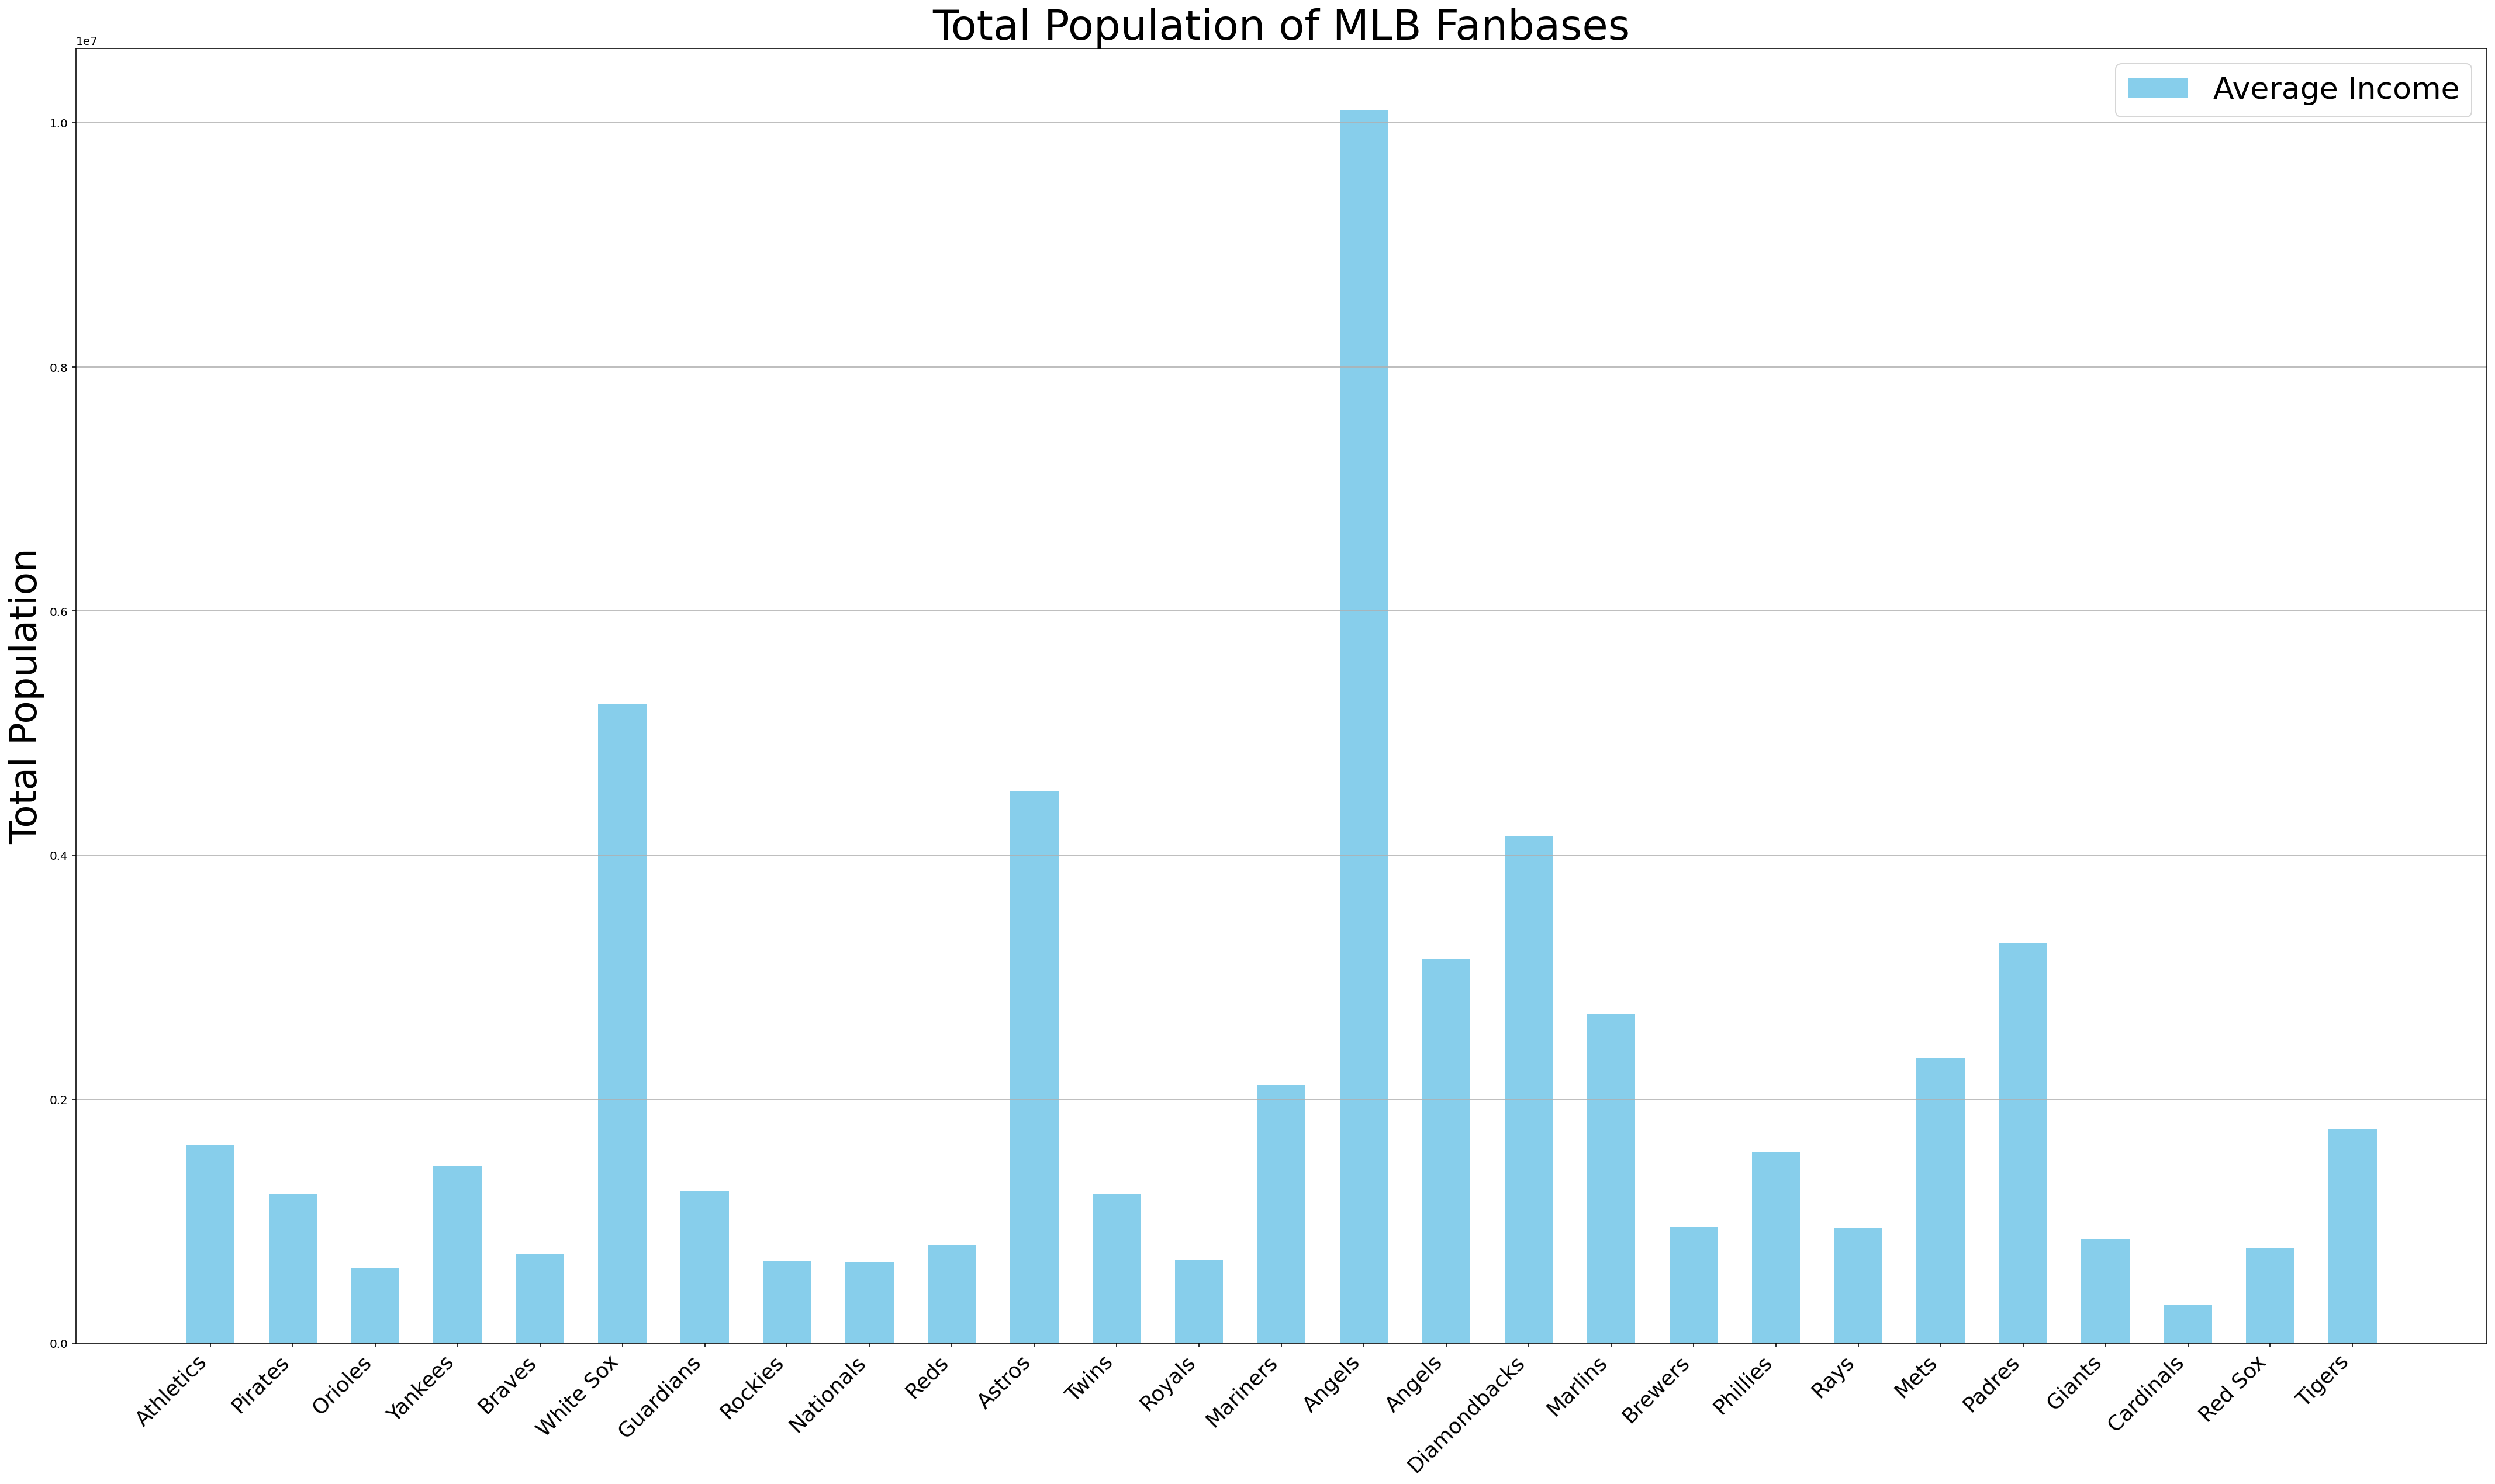

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

df_mlb_geo = df_mlb_geo[~df_mlb_geo['County_x'].isin(['Dallas County', 'Tarrant County'])]

combined_county = df_mlb_geo[(df_mlb_geo['County_x'] == 'Dallas County') | (df_mlb_geo['County_x'] == 'Tarrant County')].groupby(['Team']).mean().reset_index()
combined_county['County_x'] = 'Dallas County and Tarrant County'
df_combined = pd.concat([df_mlb_geo, combined_county])

county_to_team = {
    'Alameda County': 'Oakland Athletics',
    'Allegheny County': 'Pittsburgh Pirates',
    'Baltimore city': 'Baltimore Orioles',
    'Bronx County': 'New York Yankees',
    'Cobb County': 'Atlanta Braves',
    'Cook County': 'Chicago White Sox',
    'Cuyahoga County': 'Cleveland Guardians',
    'Dallas County and Tarrant County': 'Texas Rangers', # <-- combined Texas Rangers
    'Denver County': 'Colorado Rockies',
    'District of Columbia': 'Washington Nationals',
    'Hamilton County': 'Cincinnati Reds',
    'Harris County': 'Houston Astros',
    'Hennepin County': 'Minnesota Twins',
    'Jackson County': 'Kansas City Royals',
    'King County': 'Seattle Mariners',
    'Los Angeles County': 'Los Angeles Dodgers',
    'Maricopa County': 'Arizona Diamondbacks',
    'Miami-Dade County': 'Miami Marlins',
    'Milwaukee County': 'Milwaukee Brewers',
    'Orange County': 'Los Angeles Angels',
    'Philadelphia County': 'Philadelphia Phillies',
    'Pinellas County': 'Tampa Bay Rays',
    'Queens County': 'New York Mets',
    'San Diego County': 'San Diego Padres',
    'San Francisco County': 'San Francisco Giants',
    'St. Louis city': 'St. Louis Cardinals',
    'Suffolk County': 'Boston Red Sox',
    'Wayne County': 'Detroit Tigers'
}

# Create a new column 'Team' in your DataFrame
df_mlb_grouped['Team'] = df_mlb_geo['County_x'].map(county_to_team)

plt.figure(figsize=(30, 18))

bar1 = np.arange(len(df_mlb_geo['County_x']))

# Create the bars
plt.bar(bar1, df_mlb_geo['TotalPop'], color='skyblue', width=bar_width, edgecolor='white', label='Average Income')

# Add labels and title
plt.ylabel('Total Population', fontsize=32)
plt.title('Total Population of MLB Fanbases', fontsize=36)

# Now you can use 'Team' for your x-axis labels:
plt.xticks([r for r in range(len(df_mlb_geo['Team']))], df_mlb_geo['Team'], rotation=45, ha='right', fontsize=18)

# Add a y-axis grid for better visibility of bars
plt.grid(axis='y')

# Add legend
plt.legend(fontsize=26)

# Add some padding for labels
plt.tight_layout(pad=2)

# Save the figure
plt.savefig('MLB_Population.pdf', format='pdf')

# Show the plot
plt.show()
